# Emotion detection project

In this section images will be loaded and tested

In [1]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import cv2 as cv
import numpy as np
import torch
import csv
import helper
import pandas
import matplotlib.pyplot as plt

In [2]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
csv_reader = open('Dataset/500_picts_satz.csv','r')
reader = [row for row in csv.reader(csv_reader)]

print (reader[5][1])

csv_reader.close()

Spencer_Abraham_0003.jpg


In [4]:
print (reader[5][1])
val = reader[5][1]
print (val)
img = cv.imread("Dataset/images/"+val,0)
re_img = cv.resize(img,(int(img.shape[1]/7),int(img.shape[0]/7)))

Spencer_Abraham_0003.jpg
Spencer_Abraham_0003.jpg


In [6]:
print (re_img.shape)

(50, 50)


tensor([[233,  87,  60,  ..., 159, 145,  77]], dtype=torch.uint8)


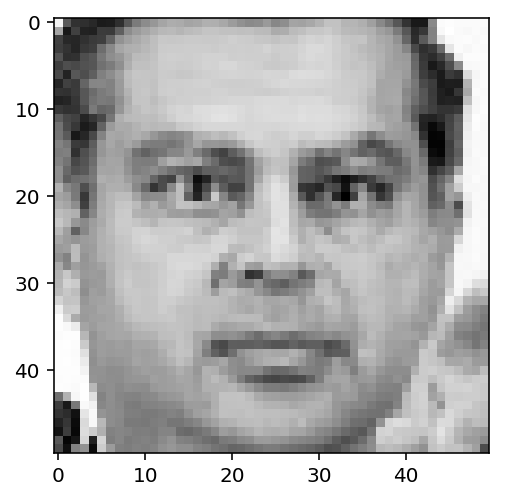

In [21]:
plt.imshow(re_img, cmap='Greys_r')
#re_img = torch.from_numpy(re_img)
new_img = re_img.view(1,-1)
print (new_img)

In [22]:
import torch.nn.functional as F
from torch import nn

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.fc1 = nn.Linear(2500, 1000)
        self.fc2 = nn.Linear(1000, 350)
        self.fc3 = nn.Linear(350, 64)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(64, 6)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.softmax(self.output(x))
        
        return x
    
model = Network()
model

Network(
  (fc1): Linear(in_features=2500, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=350, bias=True)
  (fc3): Linear(in_features=350, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=6, bias=True)
)

In [39]:
print (new_img[:])
print (new_img.type)
y = new_img.float()
y.type()
y.size()
ps = model.forward(y[:])
ps

tensor([[233,  87,  60,  ..., 159, 145,  77]], dtype=torch.uint8)
<built-in method type of Tensor object at 0x7fc41924ea68>


/home/bllgg/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


tensor([[2.2633e-01, 6.4421e-03, 2.9985e-01, 1.1789e-04, 1.0556e-07, 4.6726e-01]],
       grad_fn=<SoftmaxBackward>)